# IEEE SPS Seasonal School on Networked Federated Learning 
# https://ieeespcasfinland.github.io/

# Exericse 1 

## Learning Goals 
After completing this exercise, you should  

* know the basic components of Linear Regression 
* be familiar the basic idea of Gradient Descent 
* be able to apply to apply Gradient Descent to Linear Regression 
* be able to read in datapoints from a csv file 

## Linear (Least-Squares) Regression

Consider data points each of which is characterized by a numeric label $y$ and a numberic feature vector $\mathbf{x}= \big(x_{1},\ldots,x_{n}\big)^{T}$. We would like to find (or learn) a linear map (hypothesis) $h^{(\mathbf{w})}(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x} = \sum_{j=1}^{n} w_{j} x_{j}$ to predict the label $y$ of a data point based solely on its feature vector. Note that the linear map $h^{(\mathbf{w})}(\mathbf{x})$ is fully characterized by its weights vector $\mathbf{w} = \big(w_{1},\ldots,w_{n}\big)^{T}$. 

A popular performance measure for the usefulness of a prediction $h(\mathbf{x})$ for a numeric label $y$ is the squared error loss $\big( y - h(\mathbf{x}) \big)^{2}$. Given a set of labeled data points $\big( \mathbf{x}^{(1)},y^{(1)} \big),\ldots,\big(\mathbf{x}^{(m)},y^{(m)} \big)$, we learn a weight vector by minimizing the average squared error (mean squared error or MSE): 
$$ \min_{\mathbf{w} \in \mathbb{R}^{n}} \sum_{i=1}^{m} \big( \underbrace{\mathbf{w}^{T} \mathbf{x}^{(i)}}_{ h(\mathbf{x}^{(i)})} - y^{(i)} \big)^2. \quad \quad {\rm (LinearRegression)}$$ 

## Gradient Descent  

It can be shown that minimizing the MSE is equivalent to solving (see [1, Ch. 5]) 
$$ \min_{\mathbf{w}} f(\mathbf{w}) \mbox{ , with } f(\mathbf{w}) := \| \mathbf{y} - \mathbf{X} \mathbf{w} \|^{2}_{2}.$$ Here we used the feature matrix $\mathbf{X} = \big( \mathbf{x}^{(1)},\ldots, \big)^{T}$ and the label vector $\mathbf{y} = \big(y^{(1)},\ldots\big)^{T}$. It can be shown that the objective function $f(\mathbf{w})$ is smooth and convex. We can therefore solve it using a sufficient number of gradient descent steps: 
\begin{align} 
\mathbf{w}^{(k+1)} & = \mathbf{w}^{(k)} - \alpha \nabla f\big(\mathbf{w}^{(k)}\big)  \quad \quad \mbox{ (Generic GD)}. 
\end{align}
The tuning parameter $\alpha$ is known as "step size" or "learning rate". The proper choice for the value of $\alpha$ is crucial for the behaviour of GD methods (see [1, Ch. 5]). If the learning rate $\alpha$ is chosen too small, then the GD steps (GenericGD) make only very little progress towards the optimum weight vector. On the other hand, if the learning rate is chosen too large, then the GD steps (GenericGD) might diverge ("move away") from the optimum. 

## Gradient Descent for Linear Regression
Let us now spcialize the generic GD step (GenericGD) to the objective function of Linear Regression. In particular, we obtain the following expression for the gradient $\nabla f(\mathbf{w})$: 
$$ \nabla f(\mathbf{w}) = -2 \mathbf{X}^{T} \big( \mathbf{y} - \mathbf{X} \mathbf{w}\big). \quad \mbox{ (GradientLinReg)}.$$
The derivation of this expression can be found in [2, Appendix A.4]. 
Combining (Generic GD) with (Gradient LinReg) results in the basic iteration of GD for linear ("least-squares") regression: 
\begin{align} 
\mathbf{w}^{(k+1)} & = \mathbf{w}^{(k)} + \alpha 2 \mathbf{X}^{T} \big( \mathbf{y} - \mathbf{X} \mathbf{w}^{(k)}\big) \quad \quad \mbox{ (LinRegGD)}. 
\end{align}

* [1] A. Jung, "Machine Learning: The Basics," Springer, 2022, [free draft here](https://mlbook.cs.aalto.fi)
* [2] S. Boyd and L. Vandenberghe, "Convex Optimization", Cambridge University Press, 2004 [available here](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)

# Demo 1.1 - Gradient Descent for Linear Regression. 

The code snippet below generates some data points by randomly drawing feature vectors and using them to construct labels for data points (by a noisy linear combinations of the features). These data points are them used as training data to learn a linear hypothesis map $h^{(\mathbf{w})}$ via linear regression. We approximately solve linear regession (LinearRegression) by computing a fixed number (stored in the variable `N_GD`) of GD steps (LinRegGD).

In [99]:
import numpy as np


# define the number of data points 
m=10

# create a feature matrix whose rows contain the feature vectors of individual data points 
# each data point is characterized by a feature vector (x1,x2) of lenght 2. The first feature 
# x1 is an arbitrary number while the second feature x2 is fixed to be always equal to 1 (a "dummy feature")

X = np.hstack((np.random.randn(m,1),np.ones((m,1))))

# create a "ground-truth" weight vector for synthetically generating labels of data points 
true_w = np.random.randn(2)

# create synthetic labels of data points and store them as the entries of the numpy array y 
# the label of a data point is obtained by linearly combining the features (using the weights in true_w) 
# and adding Gaussian noise with zero mean and unit variance (via np.random.randn())

noisestrength = 0.5 
y = X.dot(true_w) + noisestrength*np.random.randn(m)

# the variable "learning_rate" is used to define the step size or learning rate of the GD steps

learning_rate = 1/(2*m)

# define the number of GD steps that will be computed to obtain a weight vector that results 
# in accurate predictions for the label of a datapoint 

N_GD = 10

# the numpy array current_weights will be used to store the result of the gradient descent steps 
current_weights = np.zeros(true_w.shape)

# we will use the variable "logging_gradient" to store the norm of the gradient computing during each 
# gradient step. the norm of the gradient is a measure for how close we are already to the optimum. 

logging_gradient=[]

# for loop repeats the GD steps for a total number of "nr_iterations" 
for _ in range(N_GD):
    # compute the gradient of f(w) at the current weight vector (obtained from the previous GD step)
    gradient = -2 * X.T.dot(y - X.dot(current_weights))
    # update the current weight vector via the GD step 
    current_weights = current_weights - (learning_rate * gradient)
    # append the norm of the gradient obtained in this iteration to the list "logging_gradient"
    logging_gradient.append(np.linalg.norm(gradient))

learnt_weights = current_weights  # store the finally obtained weight vector in the variable "learnt_weights"
print("Norms of gradient:", logging_gradient[-1])
print("True weights:", true_w)
print("Learnt weights:", learnt_weights)

Norms of gradient: 0.3195938145157783
True weights: [-0.48292568  0.30204756]
Learnt weights: [-0.25001194  0.2347803 ]


Text(0.5,1,'Gradient Descent Linear Regressor')

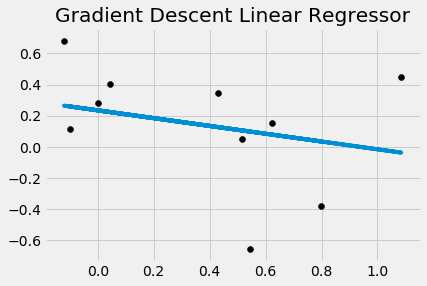

In [100]:
import matplotlib.pyplot as plt

# the following code snipet creates a plot that depicts the data points 
# using their feature x_1 and their label value y 
# the plot also includes a line that represents the linear hypothesis obtained 
# from the weights stored in the numpy array "learnt_weights"

plt.style.use('fivethirtyeight')
plt.scatter(X[:,0], y, color='black')  # scatter plot of data points whose features and labels are in X and y 
plt.plot(X[:,0], X.dot(learnt_weights)) # plot the hypothesis h(x) as a function of feature x1 
plt.gca().set_title("Gradient Descent Linear Regressor")

# Demo 1.2 - Read in Data from a csv 

The Python package `Pandas` provides the class DataFrame. A dataframe is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. We can think of DataFrame a table whose rows represent individual datapoints and whose columns represent different properties (which might be features or labels) of the datapoints.

We will demonstrate the usage of a DataFrame on data provided by the Finnish Meteorological Institute (FMI) at https://en.ilmatieteenlaitos.fi/download-observations. We have downloaded hourly weather observations at the FMI station [Utsjoki Nuorgam](https://goo.gl/maps/gugYFGGYvim57qK28) during 01.06.2021 and 31.08.2021. The data is stored in the file air_temp.csv which is located in the same directory as this notebook.

In [101]:
import pandas as pd 

# read in data from the file "air_temp.csv" and store it 
# in the DataFrame "df"

df = pd.read_csv('https://raw.githubusercontent.com/ieeespcasfinland/ieeespcasfinland.github.io/main/air_temp.csv')

# print the first 5 weather recordings in the DataFrame `df`

df.head(5) 

,Year,m,d,Time,Time zone,Air temperature (degC)
0,2021,6,1,00:00,UTC,6.2
1,2021,6,1,01:00,UTC,6.4
2,2021,6,1,02:00,UTC,6.4
3,2021,6,1,03:00,UTC,6.8
4,2021,6,1,04:00,UTC,7.1


In [102]:
# print a concise summary of a DataFrame including the index dtype and columns, non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    2209 non-null   int64  
 1   m                       2209 non-null   int64  
 2   d                       2209 non-null   int64  
 3   Time                    2209 non-null   object 
 4   Time zone               2209 non-null   object 
 5   Air temperature (degC)  2204 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 103.7+ KB


In [103]:
# change column names

df.columns=['year','month', 'day', 'time', 'time_zone','temperature'] 

# remove rows from dataframe "df" which contain missing values

df = df.dropna(axis=0) #rows are considered as axis 0

# concatenate the 3 columns "year", "month", "day" into a new column "date" in format e.g. 2022-01-26

data = df.assign(date = df["year"].astype(str)+'-'+df["month"].astype(str)+'-'+df["day"].astype(str))

# remove columns "year", "month", "day", "time_zone" that are not used 

data = data.drop(['year','month','day','time_zone'],axis=1)  #columns are axis 1

# switch column order

data = data[['date','time','temperature']]

# print the last 5 weather recordings of the new dataframe 

data.tail(5) 

,date,time,temperature
2204,2021-8-31,20:00,6.1
2205,2021-8-31,21:00,6.4
2206,2021-8-31,22:00,6.2
2207,2021-8-31,23:00,5.6
2208,2021-9-1,00:00,5.5


Sometimes we are interested in a specific column of a DataFrame, e.g. we want to use it as feature/label. we can select a single column using dataframe['column_name'], this will return a Series object. Series object has a method Series.to_numpy() which will give us a NumPy ndarray representing the values in this Series.

In [104]:
# Let us select only the column "temperature" of the DataFrame "data"
tmp = data['temperature'] 

print("The type of \"tmp\" is ", type(tmp),'\n') # check the type of this object

tmp_numeric = data['temperature'].to_numpy() 

print("The type of \"tmp_numeric\" is",type(temp_column))

print("temperature values :", tmp_numeric)


The type of "tmp" is  <class 'pandas.core.series.Series'> 

The type of "tmp_numeric" is <class 'numpy.ndarray'>
temperature values : [6.2 6.4 6.4 ... 6.2 5.6 5.5]


In [105]:
# select the first weather recording (row) stored in the DataFrame "data"
firstrow = data.iloc[0]  # `0` is the index of the first row

print("The first row: \n",firstrow) 

# select the row with name `3` by using data.loc[ ]
# NOTE `3` is interpreted as a row label name , not an integer position along the index
# the row label name could be string or other data type, not only int
rowName3 = data.loc[3] 
print("\n The row with label name '3': \n",rowName3) 

The first row: 
 date           2021-6-1
time              00:00
temperature         6.2
Name: 0, dtype: object

 The row with label name '3': 
 date           2021-6-1
time              03:00
temperature         6.8
Name: 3, dtype: object


In [106]:
# we can select a subset of a DataFrame on some condition and create a new DataFrame

# create a "newdataset" which consists only of weather recordings in "data" at "time" `03:00`
newdataset= data[data['time'] == '03:00'] 

# print randomly selected five weather recordings (rows) of "newdataset"
newdataset.sample(5) 

,date,time,temperature
291,2021-6-13,03:00,11.7
27,2021-6-2,03:00,9.4
891,2021-7-8,03:00,21.1
1731,2021-8-12,03:00,12.4
675,2021-6-29,03:00,9.5


# Task 1.1 

Try out different values for the sample size `m` and noise strength `noisestrength` in Demo 1.1. How does the number of required GD iterations (such that the iterates do not change significantly and the norm of the gradient becomes very small) depend on `m`and `noisestrength`. 


# Task 1.2 

Consider the weather data stored in the file `FMIData.csv` ([click here to download](https://raw.githubusercontent.com/ieeespcasfinland/ieeespcasfinland.github.io/main/FMIData.csv)). Each row in this file contains a daily weather measurement. Let us consider each daily weather measurement as a data point. Each data point is characterized by several properties, including the date, the location of the weather station, the minimum daytime temperature and the maximum daytime temperature. For each data point (=a daily weather recording) define the feature vector $\mathbf{x} = \big(x_{1},x_{2}\big)^{T}$ with $x_{1}$ being the minimum temperature and $x_{2} = 1$ (a "dummy" feature). The label of a data point (daily weather recording) is the maximum temperature. Use GD for linear regression to learn the weights of a predictor $h(\mathbf{x})$ for the maximum temperature based on the minimum temperature. 